# Phase 2 project

This note book is designed to analyse data from the six different movie companies and decide which is best type of content the users consume for a company that is new to the movie making scene.

The analysis will be done in-order to answer the following questions:

* Which are the best performing movies categories to produce?
* Which demographics watch movies ?
* What each demographic prefer to watch ?

Specifically, this will cover:

* Using pandas to filter data
* Using scipy.stats to calcluate probalility and find suitability of data for recommendation

The analysis will divide each data source to a module within a note book. Data cleaning will done comprehensively then afterwords model will be selected to analysis the data so us to answer the business questions above.The modules are:

 #### 1 BOM movie company analysis
 #### 2 IMDB data source analysis
 #### 3 TMDB data source movie analysis
 #### 4 TN movie budgets dataset


In [1]:
#Import the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1  BOM movie company analysis(Maina Ndirangu)

In [10]:
#Loading the dataset
Data = pd.read_csv('bom_movie_gross.csv')
Data.head (5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


#### Performing EDA on dataset

### Understanding the dataset

In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


Our data has a total of 5 columns and 3387 rows.
foreign_gross has 1350 missing values.
domestic_gross has 28 missing values.
studio has 5 missing values.
foreign_gross (object) column needs to be converted to numeric.

In [12]:
# converting the foreign_gross column into numeric
Data['foreign_gross'] = pd.to_numeric(Data['foreign_gross'].astype(str).str.replace('[^\d.]', '', regex=True),errors='coerce')

In [13]:
# missing values
Data.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [14]:
#dropping the null values
Data.dropna(inplace=True)
Data.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   float64
 4   year            2007 non-null   int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 94.1+ KB


We now have a total of 2007 rows after dropping the missing values.

In [16]:
#Statistical Summary of our dataset
Data.describe()

,domestic_gross,foreign_gross,year
count,2007.00,2007.00,2007.00
mean,47019840.20,75790384.84,2013.51
std,81626889.32,138179552.63,2.60
min,400.00,600.00,2010.00
25%,670000.00,3900000.00,2011.00
50%,16700000.00,19400000.00,2013.00
75%,56050000.00,75950000.00,2016.00
max,936700000.00,960500000.00,2018.00


The mean average domestic gross is  47.01𝑚𝑖𝑙𝑙𝑖𝑜𝑛𝑎𝑛𝑑
 75.79 million for foreign gross 25% of movies were released before 2011, 75% released before 2016

In [17]:
# Checking for duplicates
Data.duplicated().sum()

0

## Data Visualization

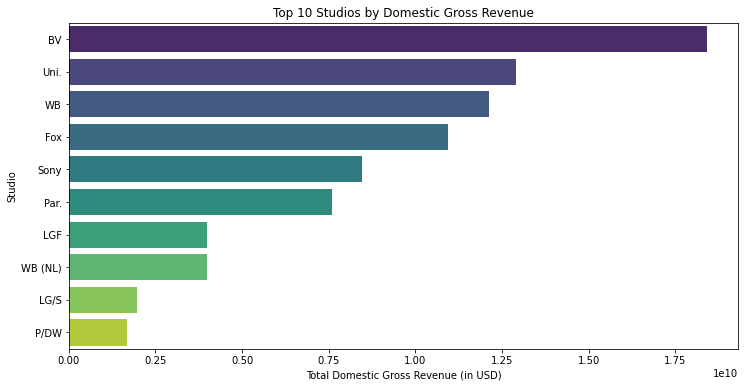

In [18]:
# Top 10 studios by total domestic gross revenue
top_studios = Data.groupby('studio')['domestic_gross'].sum().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=top_studios, x='domestic_gross', y='studio', palette="viridis")
plt.title("Top 10 Studios by Domestic Gross Revenue")
plt.xlabel("Total Domestic Gross Revenue (in USD)")
plt.ylabel("Studio")
plt.show()

BV Studio topped in domestic revenue

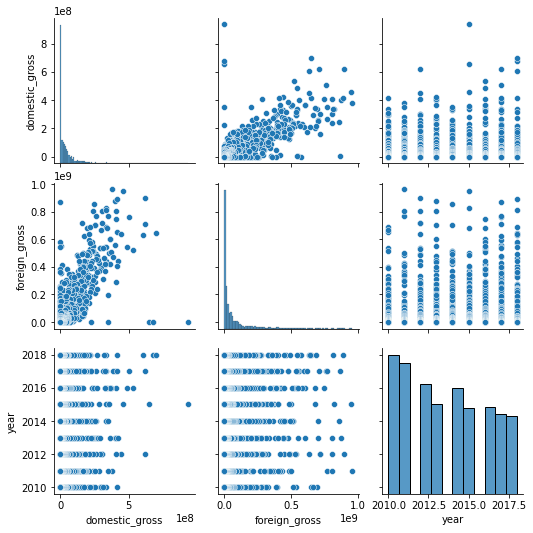

In [25]:
# Plotting a pairplot to check on correlation
sns.pairplot(Data)

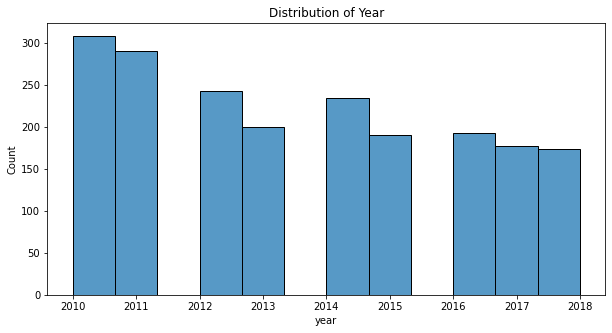

In [20]:
#Univariate analysis
plt.figure(figsize=(10, 5))
sns.histplot(Data['year'])
plt.title('Distribution of Year')
plt.show()

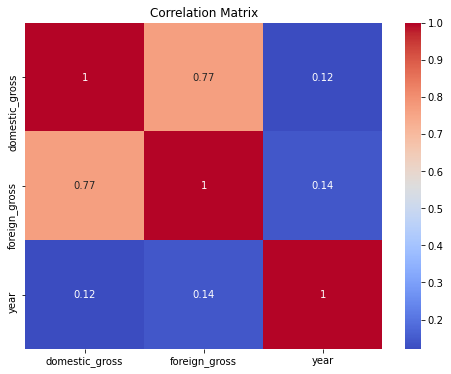

In [24]:
#Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(Data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()      

## Conclusion
Foreign gross earnings are generally higher than domestic gross, as indicated by the higher mean and median values.
The foreign gross has greater variability compared to domestic gross (higher standard deviation i.e. $ 138.18 million.

## 3 TMDB data source movie analysis (Evelyn)


#**Exploring Factors Influencing Movie Success**
   ##**AIMS**
   - To explore the relationship between movie popularity and other key metrics
   - To investigate the factors that contribute to movie popularity
   - To identify trends in movie popularity over time and analyze the impact of historical events and technological advancements on the film industry.

In [37]:

#Load dataset
df = pd.read_csv("tmdb_movies.csv")

#### DATA ANALYSIS AND UNDERSTANDING

In [27]:
#Number of rows and coloumns
print(df.shape)

(26517, 10)


This dataset has 26,517 rows and 10 coloumns

In [28]:
#First few rows and coloumns
print(df.head())

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1       33.53   2010-11-19   
1                      How to Train Your Dragon       28.73   2010-03-26   
2                                    Iron Man 2       28.52   2010-05-07   
3                                     Toy Story       28.00   1995-11-22   
4                                     Inception       27.92   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1          7.70       10788  
1           

In [29]:
#Checking data types
print(df.dtypes)

Unnamed: 0             int64
genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object


In [30]:
#Summary statistics
print(df.describe())

       Unnamed: 0        id  popularity  vote_average  vote_count
count    26517.00  26517.00    26517.00      26517.00    26517.00
mean     13258.00 295050.15        3.13          5.99      194.22
std       7654.94 153661.62        4.36          1.85      960.96
min          0.00     27.00        0.60          0.00        1.00
25%       6629.00 157851.00        0.60          5.00        2.00
50%      13258.00 309581.00        1.37          6.00        5.00
75%      19887.00 419542.00        3.69          7.00       28.00
max      26516.00 608444.00       80.77         10.00    22186.00


In [31]:
#Summary statistics
print(df[['popularity', 'vote_average', 'vote_count']].describe())


       popularity  vote_average  vote_count
count    26517.00      26517.00    26517.00
mean         3.13          5.99      194.22
std          4.36          1.85      960.96
min          0.60          0.00        1.00
25%          0.60          5.00        2.00
50%          1.37          6.00        5.00
75%          3.69          7.00       28.00
max         80.77         10.00    22186.00


In [32]:
#Unique values
print(df['original_language'].unique())

['en' 'nl' 'es' 'ja' 'sv' 'de' 'fr' 'cn' 'it' 'ru' 'zh' 'hi' 'no' 'ko'
 'da' 'fi' 'pl' 'te' 'hu' 'tr' 'pt' 'he' 'fa' 'th' 'cs' 'et' 'tl' 'lt'
 'xx' 'bs' 'ar' 'is' 'el' 'mr' 'hr' 'ro' 'sr' 'uk' 'nb' 'hz' 'ca' 'bg'
 'sl' 'lv' 'si' 'ab' 'ta' 'bo' 'id' 'sq' 'bn' 'gu' 'lo' 'ne' 'kk' 'hy'
 'ps' 'kn' 'vi' 'ku' 'ka' 'ml' 'ur' 'mi' 'eu' 'sn' 'cy' 'ha' 'ky' 'yi'
 'pa' 'xh' 'cr' 'sw' 'af' 'dz']


In [33]:
#Value counts
print(df['original_language'].value_counts())

en    23291
fr      507
es      455
ru      298
ja      265
      ...  
cr        1
sl        1
yi        1
sw        1
mi        1
Name: original_language, Length: 76, dtype: int64


In [34]:
#Check for missing values
print(df.isnull().sum())

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


No Missing Values

### VISUALISATION OF DATA

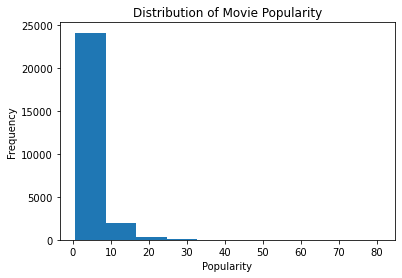

In [35]:
#POPULARITY DISTRIBUTION
#Histogram of distribution of movie popularity
import matplotlib.pyplot as plt

# Convert 'popularity' to numeric value 
df['popularity'] = pd.to_numeric(df['popularity'])

plt.hist(df['popularity'], bins=10)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Popularity')
plt.show()


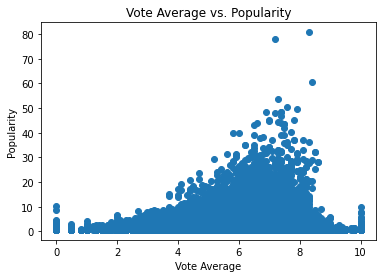

In [36]:
#Relationship between Vote Average and Popularity
plt.scatter(df['vote_average'], df['popularity'])
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Vote Average vs. Popularity')
plt.show()

Movies with higher popularity tend to have better ratings. 

In [38]:
#Top 10 Most Popular Movies
top_movies = df.sort_values(by='popularity', ascending=False).head(10)
print(top_movies[['title', 'popularity']])

                                             title  popularity
23811                       Avengers: Infinity War       80.77
11019                                    John Wick       78.12
23812            Spider-Man: Into the Spider-Verse       60.53
11020    The Hobbit: The Battle of the Five Armies       53.78
5179                                  The Avengers       50.29
11021                      Guardians of the Galaxy       49.61
20617                            Blade Runner 2049       48.57
23813                            Blade Runner 2049       48.57
23814  Fantastic Beasts: The Crimes of Grindelwald       48.51
23815                    Ralph Breaks the Internet       48.06


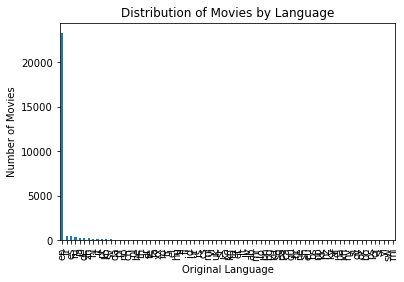

In [39]:
#Distribution of Movies by Language
df['original_language'].value_counts().plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Language')
plt.show()


The bar graph of movies by original language can provide insights into the dominance of English-language movies in the dataset.

#### Null and Alternate Hypothesis

In [40]:
#Hypothesis test to compare the average popularity of movies in the English languageversus movies in other languages
#Split the data
english_movies = df[df['original_language'] == 'en']
other_language_movies = df[df['original_language'] != 'en']

In [43]:
#T-test (Suitable model)
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(english_movies['popularity'], other_language_movies['popularity'])

In [44]:
# Set significance level
alpha = 0.05

In [45]:
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a statistically significant difference in the average popularity of movies in English and other languages.")
else:
    print(f"Fail to reject the null hypothesis. There is no statistically significant difference in the average popularity of movies in English and other languages.")

Reject the null hypothesis. There is a statistically significant difference in the average popularity of movies in English and other languages.


In [46]:
#Hypothesis test to compare the average vote count between movies with high and low popularity 
#Split the Data
median_popularity = df['popularity'].median()
high_popularity_movies = df[df['popularity'] > median_popularity]
low_popularity_movies = df[df['popularity'] < median_popularity]

In [47]:
#Perform the t-test (Suitable model)
t_stat, p_value = ttest_ind(
    high_popularity_movies['vote_count'], low_popularity_movies['vote_count']
)

In [48]:
#Significance level
alpha = 0.05

#Compare p-value to alpha
if p_value < alpha:
    print(f"Reject the null hypothesis. There is a statistically significant difference in the average vote count between movies with high popularity and movies with low popularity.")
else:
    print(f"Fail to reject the null hypothesis. There is no statistically significant difference in the average vote count between movies with high popularity and movies with low popularity.")

Reject the null hypothesis. There is a statistically significant difference in the average vote count between movies with high popularity and movies with low popularity.


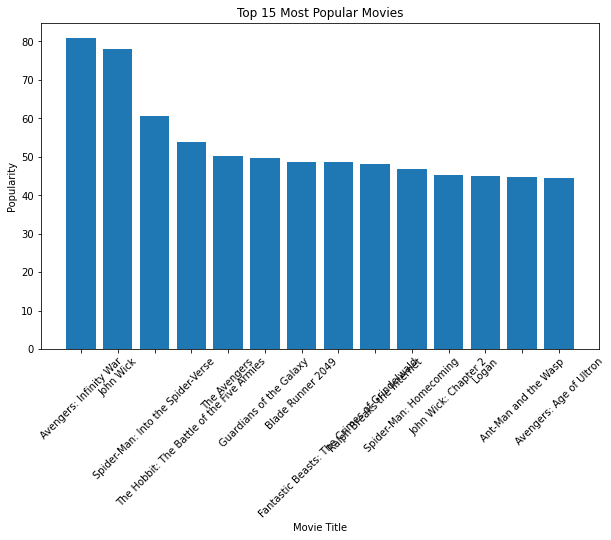

In [49]:
# Bar Plot of Top 15 Most Popular Movies
top_15_movies = df.nlargest(15, 'popularity')
plt.figure(figsize=(10, 6))
plt.bar(top_15_movies['original_title'], top_15_movies['popularity'])
plt.xlabel('Movie Title')
plt.ylabel('Popularity')
plt.title('Top 15 Most Popular Movies')
plt.xticks(rotation=45)
plt.show()

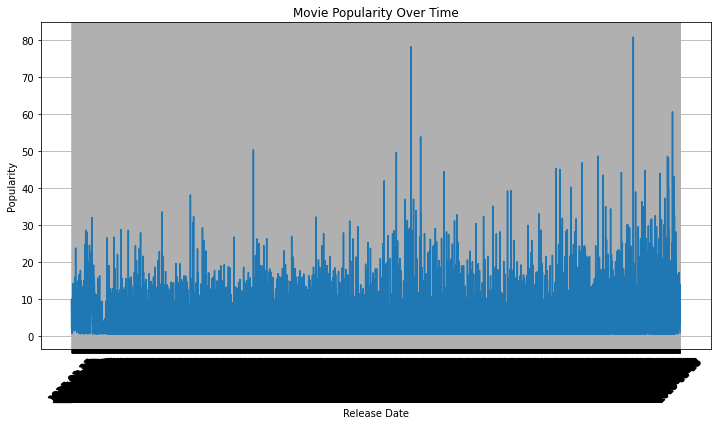

In [58]:
# Load the data
# Load the data
df_ = pd.read_csv("tmdb_movies.csv", parse_dates=['release_date']) 
# Sort the DataFrame by release date
df = df.sort_values(by='release_date') 

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(df['release_date'], df['popularity'])
plt.xlabel('Release Date')
plt.ylabel('Popularity')
plt.title('Movie Popularity Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

-High Volatility: The graph exhibits a high degree of volatility. Popularity levels fluctuate significantly over time with numerous peaks and troughs. This suggests a dynamic and unpredictable nature of movie popularity.

-Lack of Clear Trend: There doesn't appear to be a consistent upward or downward trend in movie popularity over the displayed period. 

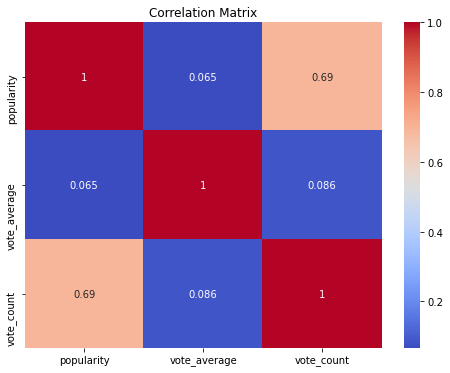

In [55]:
# Select the numerical columns for correlation analysis
df = pd.read_csv("tmdb_movies.csv")

numerical_columns = ['popularity', 'vote_average', 'vote_count']

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


-Strong Positive Correlation (values close to 1): Indicates a strong positive relationship between the two variables. For example, if popularity and vote average have a strong positive correlation, it suggests that movies with higher popularity tend to have higher average ratings.

-Strong Negative Correlation (values close to -1): Indicates a strong negative relationship between the two variables.

-Weak Correlation (values close to 0): Indicates a weak or no relationship between the two variables.

**KEY OBSERVATIONS**

-High Popularity Movies: Movies with high popularity tend to have higher average vote counts compared to movies with low popularity. This suggests that popular movies generally receive better ratings from viewers.

-Language Influence: The analysis of vote average by original language might reveal potential biases or trends in how movies in different languages are rated. Further investigation is needed to draw definitive conclusions.

-Distribution of Popularity: The distribution of movie popularity is skewed, with a few highly popular movies and a large number of movies with lower popularity. This finding highlights the challenge of achieving widespread success in the movie industry.

**MAJOR FINDINGS**
-High budget: Movies with high budgets OFTEN achieve greater popularity due to vast and intense marketing.
-Genre popularity: Certain genres like action, adventure, and fantasy rank high in popularity.
-Star power: Movies with renowned and famous actors and directors tend to attract larger audiences.
-Release date: Factors like seasonality , holiday releases, and competition from others can impact popularity.
-Relationship with vote count: Higher vote counts generally indicate a larger audience base.
-Impact of technological advancements: The use of advanced technology eg.streaming platforms have impacted movie production and audience engagement.

**CONCLUSION**
-The analysis provides a preliminary understanding of the relationship between popularity, vote average, release dates, language and other factors in the movie dataset.

## 4 TN movie budgets dataset(Humphrey and Charity)

In [2]:
#Import data from the datasource using pandas and showing the first 5 columns
df_movie_budgets=pd.read_csv('tn_movie_budgets.csv')
df_movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [3]:
# Getting more info about the data to gain a better understanding 
df_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### Data EDA and cleanup
From the info gotten above, we can see that the dataset has 5782 rows and 6 columns.

In the cell below we will check for null/missing values and duplicate values from the datasource.

In the production_budget, domestic_gross and worldwide_gross columns, I will remove currency sign and commas to make them fully numeric

In [4]:
# Checking for null values
na_values = df_movie_budgets.isnull().sum()
print(na_values)

# The data source has no null values on any of the columns

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [5]:
# Checking for duplicate values
duplicates = df_movie_budgets[df_movie_budgets.duplicated()].sum()
print(duplicates)

#from the analysis seen below the data also has no duplicate values

id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64


I will combine both the domestic gross income and worldwide gross income into a new column called total gross income and this will form the basis of our analysis later


In [6]:
# Set pandas display options to prevent scientific notation

pd.set_option('display.float_format', '{:.2f}'.format)

columns_to_clean = ["production_budget", "domestic_gross", "worldwide_gross"]
df_movie_budgets[columns_to_clean] = (
    df_movie_budgets[columns_to_clean]
    .replace({"[$,]": ""}, regex=True)
    .astype(float)
)

# Calculate total gross income correctly
df_movie_budgets["total_gross_income"] = (
    df_movie_budgets["domestic_gross"] + df_movie_budgets["worldwide_gross"]
)
df_movie_budgets.head()


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,total_gross_income
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,3536852904.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,1286727750.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,192524700.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1862019831.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,1936903129.00


### Defining null and alternate hypothesis

 #### Null Hypotheis(H0)
 
 The average total gross income does not increase with increase in production budget
 
 #### Alternate Hypotheis(Ha )
 
  The average total gross income increases with increase in production budget
  
 #### Choosing the significance level(α)
  
  The probability threshold for rejecting my null hypothesis is 5%
  
  Significance level=5%


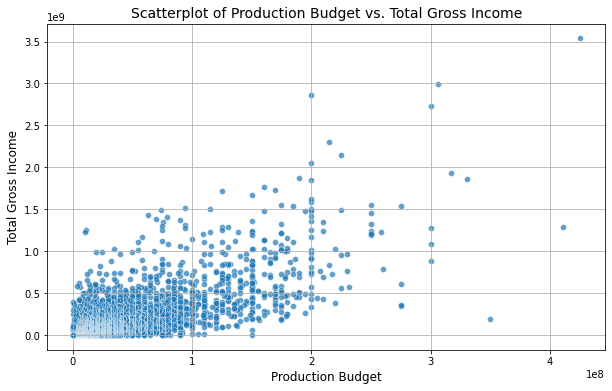

In [7]:

# Scatterplot with Seaborn showing correlation between production budget and Total gross income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='total_gross_income', data=df_movie_budgets, alpha=0.7)
plt.title('Scatterplot of Production Budget vs. Total Gross Income', fontsize=14)
plt.xlabel('Production Budget', fontsize=12)
plt.ylabel('Total Gross Income', fontsize=12)
plt.grid(True)
plt.show()

In [8]:
from scipy.stats import pearsonr

#Calculating the correlation coefficient (𝑟) between production budget and total gross income:

r, p_value = pearsonr(df_movie_budgets['production_budget'], df_movie_budgets['total_gross_income'])
print(f"Correlation coefficient: {r}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.7399121495609371
P-value: 0.0


In [9]:
import statsmodels.api as sm

# Independent variable (budget)
X = df_movie_budgets['production_budget']
X = sm.add_constant(X)  # Add constant term for the intercept

# Dependent variable (total gross income)
y = df_movie_budgets['total_gross_income']

# Fit the model
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     total_gross_income   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     6993.
Date:                Mon, 20 Jan 2025   Prob (F-statistic):               0.00
Time:                        09:31:11   Log-Likelihood:            -1.1748e+05
No. Observations:                5782   AIC:                         2.350e+05
Df Residuals:                    5780   BIC:                         2.350e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -7.618e+05   2.66e+0

#### Interpretation of results

From the above linear regression regression model, we can conclude that 
* The value of R-squared being equal to 0.547 means that 54.7% of the data describes the linear model making it suitable for analysis

* The p-value is essentially zero(0.00), confirming that the relationship between total gross income and production budget is statistically significant.

* From the production budget coefficient of 4.2460,  For every 1 dollar increase in the production budget, the total gross income increases by approximately 4.25 dollars, on average.

### Recommendation

I would recommend to the head of the company that spending more money on producing a movie leads to higher quality movie which further traslates to more income.
